In [1]:
# Install gurobipy library
!pip install gurobipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.4/14.4 MB 15.8 MB/s eta 0:00:00


In [58]:
# Call gurobipy library
import gurobipy as gp
from gurobipy import *

# Call pandas library
import pandas as pd
import gurobipy as grb
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Sets
I = 5 # Set of manufacturer (1,2,3,4,5)
J = 4 # Set of destination (HCM, HN, HP, DN)

# Parameters
contract_cost = [
  [704986,704370,639831,781834],
  [681994,744763,759315,727634],
  [649896,669537,664394,653397],
  [731885,753833,773519,699531],
  [699373,653177,653177,670911]
]

demand = [40,50,37,35]

supply = [50,38,31,45,31]


```
Chào thầu cho thùng/1000 khẩu trang,,,,,
,Hồ Chí Minh,Hà Nội,Hải Phòng,Đà Nẵng,
Nhà sản xuất 1,"  704,986.00 ","  704,370.00 ","  639,830.00 ","  781,834.00 ",
Nhà sản xuất 2,"  681,994.00 ","  744,763.00 ","  759,305.00 ","  727,634.00 ",
Nhà sản xuất 3,"  649,896.00 ","  669,537.00 ","  664,394.00 ","  653,397.00 ",
Nhà sản xuất 4,"  722,885.00 ","  753,833.00 ","  773,519.00 ","  699,529.00 ",
Nhà sản xuất 5,"  699,373.00 ","  652,477.00 ","  652,477.00 ","  670,911.00 ",
,,,,,
Nhu cầu của các Trung tâm như sau,,,,,
,Hồ Chí Minh,Hà Nội,Hải Phòng,Đã Nẵng,
Đơn vị: thùng/1000 cái,40,50,37,35,
,,,,,
Giới hạn về năng lực cung ứng  của các Nhà sản xuất,,,,,
,Nhà sản xuất 1,Nhà sản xuất 2,Nhà sản xuất 3,Nhà sản xuất 4,Nhà sản xuất 5
Đơn vị: thùng/1000 cái,50,38,30,45,30
```


MINIMUM COST OF GOOD SOLD


In [16]:
# Create model
model = gp.Model('Network_Optimize')

# Create variables x = model.addVars(*indices, lb=0.0, ub=None, obj=0.0, vtype=GRB.CONTINUOUS, name="")
x = model.addVars(I, J, lb=0, vtype=GRB.CONTINUOUS, name = 'ij')


# Set objective function model.setObjective(expression, sense)
objective = gp.quicksum(contract_cost[i][j]*x[i,j] for i in range(I) for j in range(J))

model.setObjective(objective,GRB.MINIMIZE)

# Constraints
model.addConstrs((gp.quicksum(x[i,j] for j in range(J)) <= supply[i] for i in range(I)), name = 'supply constraint')
model.addConstrs((gp.quicksum(x[i,j] for i in range(I)) == demand[j] for j in range(J)), name = 'demand constraint')


{0: <gurobi.Constr *Awaiting Model Update*>,
 1: <gurobi.Constr *Awaiting Model Update*>,
 2: <gurobi.Constr *Awaiting Model Update*>,
 3: <gurobi.Constr *Awaiting Model Update*>}

In [17]:
# Optimize model
model.optimize()

Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (linux64 - "Ubuntu 22.04.3 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 9 rows, 20 columns and 40 nonzeros
Model fingerprint: 0xdf877507
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [6e+05, 8e+05]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e+01, 5e+01]
Presolve time: 0.01s
Presolved: 9 rows, 20 columns, 40 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.0519733e+08   6.300000e+01   0.000000e+00      0s
       6    1.0773433e+08   0.000000e+00   0.000000e+00      0s

Solved in 6 iterations and 0.02 seconds (0.00 work units)
Optimal objective  1.077343330e+08


In [18]:
model.getVars()

[<gurobi.Var ij[0,0] (value 0.0)>,
 <gurobi.Var ij[0,1] (value 13.0)>,
 <gurobi.Var ij[0,2] (value 37.0)>,
 <gurobi.Var ij[0,3] (value 0.0)>,
 <gurobi.Var ij[1,0] (value 38.0)>,
 <gurobi.Var ij[1,1] (value 0.0)>,
 <gurobi.Var ij[1,2] (value 0.0)>,
 <gurobi.Var ij[1,3] (value 0.0)>,
 <gurobi.Var ij[2,0] (value 2.0)>,
 <gurobi.Var ij[2,1] (value 6.0)>,
 <gurobi.Var ij[2,2] (value 0.0)>,
 <gurobi.Var ij[2,3] (value 23.0)>,
 <gurobi.Var ij[3,0] (value 0.0)>,
 <gurobi.Var ij[3,1] (value 0.0)>,
 <gurobi.Var ij[3,2] (value 0.0)>,
 <gurobi.Var ij[3,3] (value 12.0)>,
 <gurobi.Var ij[4,0] (value 0.0)>,
 <gurobi.Var ij[4,1] (value 31.0)>,
 <gurobi.Var ij[4,2] (value 0.0)>,
 <gurobi.Var ij[4,3] (value 0.0)>]

In [19]:
model.ObjVal

107734333.0

In [20]:


# Assuming you have already created the model and solved it
# model = grb.Model(...)

# Step 1: Get variables after solving the model
variables = model.getVars()

# Step 2: Collect variable names and their corresponding values into a list or DataFrame
var_names = [v.varName for v in variables]
var_values = [v.X for v in variables]

# Step 3: Create a DataFrame for easy visualization
df = pd.DataFrame({
    'Variable': var_names,
    'Value': var_values
})

# Step 4: Display the DataFrame (or print the results)
print(df)


   Variable  Value
0   ij[0,0]    0.0
1   ij[0,1]   13.0
2   ij[0,2]   37.0
3   ij[0,3]    0.0
4   ij[1,0]   38.0
5   ij[1,1]    0.0
6   ij[1,2]    0.0
7   ij[1,3]    0.0
8   ij[2,0]    2.0
9   ij[2,1]    6.0
10  ij[2,2]    0.0
11  ij[2,3]   23.0
12  ij[3,0]    0.0
13  ij[3,1]    0.0
14  ij[3,2]    0.0
15  ij[3,3]   12.0
16  ij[4,0]    0.0
17  ij[4,1]   31.0
18  ij[4,2]    0.0
19  ij[4,3]    0.0


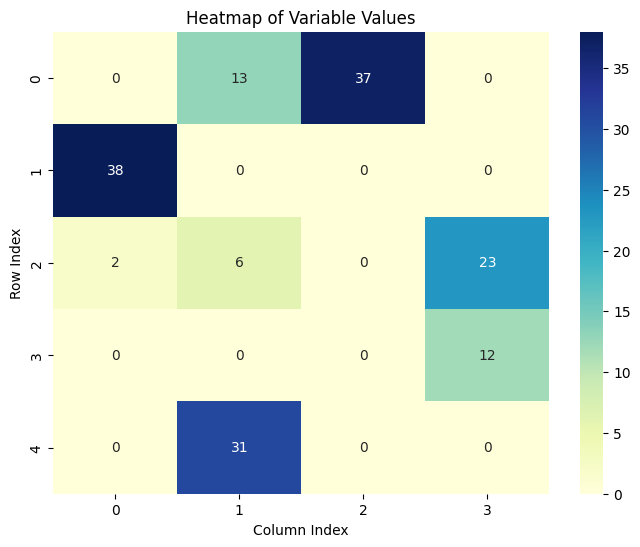

In [21]:
import seaborn as sns
import numpy as np

# Reshape the data into a 5x4 matrix (since there are 5 rows and 4 columns)
matrix = np.array([
    [0.0, 13.0, 37.0, 0.0],
    [38.0, 0.0, 0.0, 0.0],
    [2.0, 6.0, 0.0, 23.0],
    [0.0, 0.0, 0.0, 12.0],
    [0.0, 31.0, 0.0, 0.0]
])

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, cmap='YlGnBu', xticklabels=['0', '1', '2', '3'], yticklabels=['0', '1', '2', '3', '4'])
plt.title('Heatmap of Variable Values')
plt.xlabel('Column Index')
plt.ylabel('Row Index')
plt.show()

Add condition: Trong trường hợp Nhà sản xuất 1 chỉ đồng ý ký hợp đồng khi lượng mua từ 15000 cái trở lên.

In [22]:
# Sets
I = 5 # Set of manufacturer (1,2,3,4,5)
J = 4 # Set of destination (HCM, HN, HP, DN)

# Parameters
contract_cost = [
  [704986,704370,639831,781834],
  [681994,744763,759315,727634],
  [649896,669537,664394,653397],
  [731885,753833,773519,699531],
  [699373,653177,653177,670911]
]

demand = [40,50,37,35]

supply = [50,38,31,45,31]

In [65]:
# Create model
model1_2 = gp.Model('Network_Optimize1.2')

# Create variables x = model.addVars(*indices, lb=0.0, ub=None, obj=0.0, vtype=GRB.CONTINUOUS, name="")
x = model1_2.addVars(I, J, lb=0, vtype=GRB.CONTINUOUS, name = 'ij')


# Set objective function model.setObjective(expression, sense)
objective = gp.quicksum(contract_cost[i][j]*x[i,j] for i in range(I) for j in range(J))

model1_2.setObjective(objective,GRB.MINIMIZE)

# Constraints
model1_2.addConstrs((gp.quicksum(x[i,j] for j in range(J)) <= supply[i] for i in range(I)), name = 'supply constraint')
model1_2.addConstrs((gp.quicksum(x[i,j] for i in range(I)) == demand[j] for j in range(J)), name = 'demand constraint')

z = model1_2.addVars(J, vtype=gp.GRB.BINARY, name="z")
model1_2.addConstrs((x[0,j] >= 15 * z[j] for j in range(J)), name='min_value_constraint')
model1_2.addConstrs((x[0,j] <= 15 * z[j] for j in range(J)), name='binary_constraint')



{0: <gurobi.Constr *Awaiting Model Update*>,
 1: <gurobi.Constr *Awaiting Model Update*>,
 2: <gurobi.Constr *Awaiting Model Update*>,
 3: <gurobi.Constr *Awaiting Model Update*>}

In [66]:
# Optimize model
model1_2.optimize()

Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (linux64 - "Ubuntu 22.04.3 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 17 rows, 24 columns and 56 nonzeros
Model fingerprint: 0x0b154b7d
Variable types: 20 continuous, 4 integer (4 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [6e+05, 8e+05]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e+01, 5e+01]
Presolve removed 8 rows and 4 columns
Presolve time: 0.00s
Presolved: 9 rows, 20 columns, 40 nonzeros
Variable types: 16 continuous, 4 integer (4 binary)

Root relaxation: objective 1.092671e+08, 6 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0    1.092671e+08 1.0927e+08  0.00%     -    

In [67]:
if model1_2.status == gp.GRB.OPTIMAL:
    print("Optimal solution found.")
elif model1_2.status == gp.GRB.INFEASIBLE:
    print("Model is infeasible.")
elif model1_2.status == gp.GRB.UNBOUNDED:
    print("Model is unbounded.")
else:
    print("Optimization was terminated.")

Optimal solution found.


In [68]:
model1_2.getVars()

[<gurobi.Var ij[0,0] (value 0.0)>,
 <gurobi.Var ij[0,1] (value 15.0)>,
 <gurobi.Var ij[0,2] (value 15.0)>,
 <gurobi.Var ij[0,3] (value 0.0)>,
 <gurobi.Var ij[1,0] (value 38.0)>,
 <gurobi.Var ij[1,1] (value 0.0)>,
 <gurobi.Var ij[1,2] (value 0.0)>,
 <gurobi.Var ij[1,3] (value 0.0)>,
 <gurobi.Var ij[2,0] (value 2.0)>,
 <gurobi.Var ij[2,1] (value 4.0)>,
 <gurobi.Var ij[2,2] (value 22.0)>,
 <gurobi.Var ij[2,3] (value 3.0)>,
 <gurobi.Var ij[3,0] (value 0.0)>,
 <gurobi.Var ij[3,1] (value 0.0)>,
 <gurobi.Var ij[3,2] (value 0.0)>,
 <gurobi.Var ij[3,3] (value 32.0)>,
 <gurobi.Var ij[4,0] (value 0.0)>,
 <gurobi.Var ij[4,1] (value 31.0)>,
 <gurobi.Var ij[4,2] (value 0.0)>,
 <gurobi.Var ij[4,3] (value 0.0)>,
 <gurobi.Var z[0] (value -0.0)>,
 <gurobi.Var z[1] (value 1.0)>,
 <gurobi.Var z[2] (value 1.0)>,
 <gurobi.Var z[3] (value -0.0)>]

In [63]:
model1_2.ObjVal

109267065.0

In [69]:


# Assuming you have already created the model and solved it
# model = grb.Model(...)

# Step 1: Get variables after solving the model
variables = model1_2.getVars()

# Step 2: Collect variable names and their corresponding values into a list or DataFrame
var_names = [v.varName for v in variables]
var_values = [v.X for v in variables]

# Step 3: Create a DataFrame for easy visualization
df = pd.DataFrame({
    'Variable': var_names,
    'Value': var_values
})

# Step 4: Display the DataFrame (or print the results)
print(df)

   Variable  Value
0   ij[0,0]    0.0
1   ij[0,1]   15.0
2   ij[0,2]   15.0
3   ij[0,3]    0.0
4   ij[1,0]   38.0
5   ij[1,1]    0.0
6   ij[1,2]    0.0
7   ij[1,3]    0.0
8   ij[2,0]    2.0
9   ij[2,1]    4.0
10  ij[2,2]   22.0
11  ij[2,3]    3.0
12  ij[3,0]    0.0
13  ij[3,1]    0.0
14  ij[3,2]    0.0
15  ij[3,3]   32.0
16  ij[4,0]    0.0
17  ij[4,1]   31.0
18  ij[4,2]    0.0
19  ij[4,3]    0.0
20     z[0]   -0.0
21     z[1]    1.0
22     z[2]    1.0
23     z[3]   -0.0


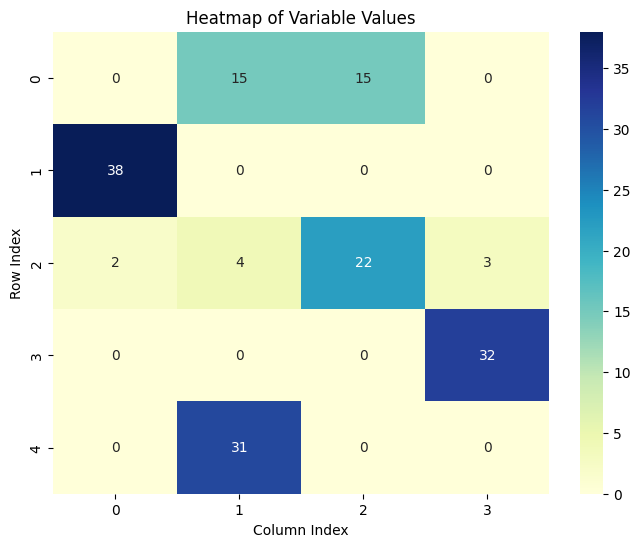

In [70]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Create a 5x4 matrix from the given data
matrix = np.array([
    [0.0, 15.0, 15.0, 0.0],
    [38.0, 0.0, 0.0, 0.0],
    [2.0, 4.0, 22.0, 3.0],
    [0.0, 0.0, 0.0, 32.0],
    [0.0, 31.0, 0.0, 0.0]
])

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, cmap='YlGnBu', xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3, 4])
plt.title('Heatmap of Variable Values')
plt.xlabel('Column Index')
plt.ylabel('Row Index')
plt.show()

In [ ]:
Câu 1.3: Trong trường hợp Nhà sản xuất 2 chỉ đồng ý ký hợp đồng khi lượng mua là bội số của 3000 cái.
             Hợp đồng được ký theo từng Trung tâm cụ thể.

In [71]:
# Sets
I = 5 # Set of manufacturer (1,2,3,4,5)
J = 4 # Set of destination (HCM, HN, HP, DN)

# Parameters
contract_cost = [
  [704986,704370,639831,781834],
  [681994,744763,759315,727634],
  [649896,669537,664394,653397],
  [731885,753833,773519,699531],
  [699373,653177,653177,670911]
]

demand = [40,50,37,35]

supply = [50,38,31,45,31]

In [72]:
# Create model
model1_3 = gp.Model('Network_Optimize1.3')

# Create variables x = model.addVars(*indices, lb=0.0, ub=None, obj=0.0, vtype=GRB.CONTINUOUS, name="")
x = model1_3.addVars(I, J, lb=0, vtype=GRB.CONTINUOUS, name = 'ij')


# Set objective function model.setObjective(expression, sense)
objective = gp.quicksum(contract_cost[i][j]*x[i,j] for i in range(I) for j in range(J))

model1_3.setObjective(objective,GRB.MINIMIZE)

# Constraints
model1_3.addConstrs((gp.quicksum(x[i,j] for j in range(J)) <= supply[i] for i in range(I)), name = 'supply constraint')
model1_3.addConstrs((gp.quicksum(x[i,j] for i in range(I)) == demand[j] for j in range(J)), name = 'demand constraint')
k = model1_3.addVars(J, vtype=gp.GRB.INTEGER, name="k")
model1_3.addConstrs((x[1,j] == 3 * k[j] for j in range(J)), name='multiple_of_3_constraint')

{0: <gurobi.Constr *Awaiting Model Update*>,
 1: <gurobi.Constr *Awaiting Model Update*>,
 2: <gurobi.Constr *Awaiting Model Update*>,
 3: <gurobi.Constr *Awaiting Model Update*>}

In [73]:
# Optimize model
model1_3.optimize()

Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (linux64 - "Ubuntu 22.04.3 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 13 rows, 24 columns and 48 nonzeros
Model fingerprint: 0xf21387ba
Variable types: 20 continuous, 4 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+00]
  Objective range  [6e+05, 8e+05]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e+01, 5e+01]
Presolve removed 4 rows and 4 columns
Presolve time: 0.00s
Presolved: 9 rows, 20 columns, 40 nonzeros
Variable types: 16 continuous, 4 integer (0 binary)

Root relaxation: objective 1.077624e+08, 5 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0    1.077624e+08 1.0776e+08  0.00%     -    

   Variable  Value
0   ij[0,0]    0.0
1   ij[0,1]   13.0
2   ij[0,2]   37.0
3   ij[0,3]    0.0
4   ij[1,0]   36.0
5   ij[1,1]    0.0
6   ij[1,2]    0.0
7   ij[1,3]    0.0
8   ij[2,0]    4.0
9   ij[2,1]    6.0
10  ij[2,2]    0.0
11  ij[2,3]   21.0
12  ij[3,0]    0.0
13  ij[3,1]    0.0
14  ij[3,2]    0.0
15  ij[3,3]   14.0
16  ij[4,0]    0.0
17  ij[4,1]   31.0
18  ij[4,2]    0.0
19  ij[4,3]    0.0
20     k[0]   12.0
21     k[1]   -0.0
22     k[2]   -0.0
23     k[3]   -0.0


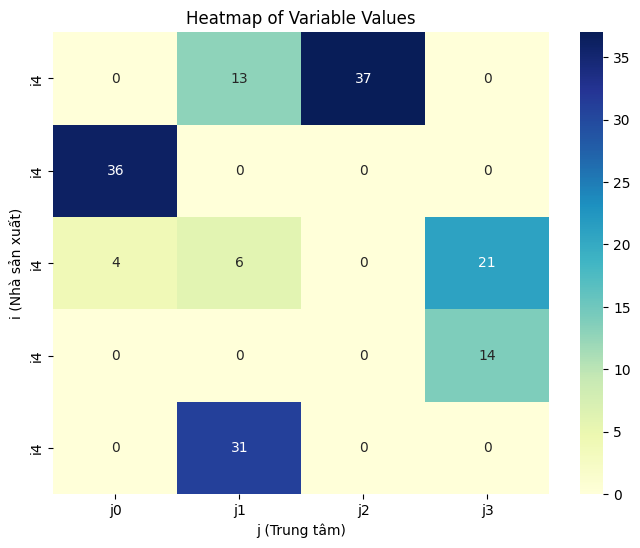

In [78]:
import re # Import the 're' module for regular expressions
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import gurobipy as gp
from gurobipy import GRB


# Assuming you have already created the model and solved it
# model = grb.Model(...)

# Step 1: Get variables after solving the model
variables = model1_3.getVars()

# Step 2: Collect variable names and their corresponding values into a list or DataFrame
var_names = [v.varName for v in variables]
var_values = [v.X for v in variables]

# Step 3: Create a DataFrame for easy visualization
df = pd.DataFrame({
    'Variable': var_names,
    'Value': var_values
})

# Step 4: Display the DataFrame (or print the results)
print(df)


matrix = np.zeros((I, J))

for v in variables:
    # Use regular expression to extract indices
    match = re.search(r'\[(\d+),(\d+)\]', v.varName)  # Find indices within brackets
    if match:
        i, j = map(int, match.groups())  # Convert matched groups to integers
        matrix[i, j] = v.X

# Bước 5: Vẽ heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, cmap='YlGnBu', xticklabels=[f'j{j}' for j in range(J)], yticklabels=[f'i{i}' for j in range(I)]) # Corrected to range(I)
plt.title('Heatmap of Variable Values')
plt.xlabel('j (Trung tâm)')
plt.ylabel('i (Nhà sản xuất)')
plt.show()

In [79]:
model1_3.ObjVal

107762405.0

In [80]:
# Create model
model1_4 = gp.Model('Network_Optimize1.4')

# Create variables x = model.addVars(*indices, lb=0.0, ub=None, obj=0.0, vtype=GRB.CONTINUOUS, name="")
x = model1_4.addVars(I, J, lb=0, vtype=GRB.CONTINUOUS, name = 'ij')


# Set objective function model.setObjective(expression, sense)
objective = gp.quicksum(contract_cost[i][j]*x[i,j] for i in range(I) for j in range(J))

model1_4.setObjective(objective,GRB.MINIMIZE)

# Constraints
model1_4.addConstrs((gp.quicksum(x[i,j] for j in range(J)) <= supply[i] for i in range(I)), name = 'supply constraint')
model1_4.addConstrs((gp.quicksum(x[i,j] for i in range(I)) == demand[j] for j in range(J)), name = 'demand constraint')

z = model1_4.addVars(J, vtype=gp.GRB.BINARY, name="z")
model1_4.addConstrs((x[0,j] >= 15 * z[j] for j in range(J)), name='min_value_constraint')
model1_4.addConstrs((x[0,j] <= 15 * z[j] for j in range(J)), name='binary_constraint')

k = model1_4.addVars(J, vtype=gp.GRB.INTEGER, name="k")
model1_4.addConstrs((x[1,j] == 3 * k[j] for j in range(J)), name='multiple_of_3_constraint')

{0: <gurobi.Constr *Awaiting Model Update*>,
 1: <gurobi.Constr *Awaiting Model Update*>,
 2: <gurobi.Constr *Awaiting Model Update*>,
 3: <gurobi.Constr *Awaiting Model Update*>}

In [81]:
# Optimize model
model1_4.optimize()

Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (linux64 - "Ubuntu 22.04.3 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 21 rows, 28 columns and 64 nonzeros
Model fingerprint: 0xd437ab3a
Variable types: 20 continuous, 8 integer (4 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [6e+05, 8e+05]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e+01, 5e+01]
Presolve removed 12 rows and 8 columns
Presolve time: 0.00s
Presolved: 9 rows, 20 columns, 40 nonzeros
Variable types: 12 continuous, 8 integer (4 binary)

Root relaxation: objective 1.092951e+08, 5 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0    1.092951e+08 1.0930e+08  0.00%     -   

In [82]:
model1_4.ObjVal

109295137.0

   Variable  Value
0   ij[0,0]    0.0
1   ij[0,1]   15.0
2   ij[0,2]   15.0
3   ij[0,3]    0.0
4   ij[1,0]   36.0
5   ij[1,1]    0.0
6   ij[1,2]    0.0
7   ij[1,3]    0.0
8   ij[2,0]    4.0
9   ij[2,1]    4.0
10  ij[2,2]   22.0
11  ij[2,3]    1.0
12  ij[3,0]    0.0
13  ij[3,1]    0.0
14  ij[3,2]    0.0
15  ij[3,3]   34.0
16  ij[4,0]    0.0
17  ij[4,1]   31.0
18  ij[4,2]    0.0
19  ij[4,3]    0.0
20     z[0]   -0.0
21     z[1]    1.0
22     z[2]    1.0
23     z[3]   -0.0
24     k[0]   12.0
25     k[1]   -0.0
26     k[2]   -0.0
27     k[3]   -0.0


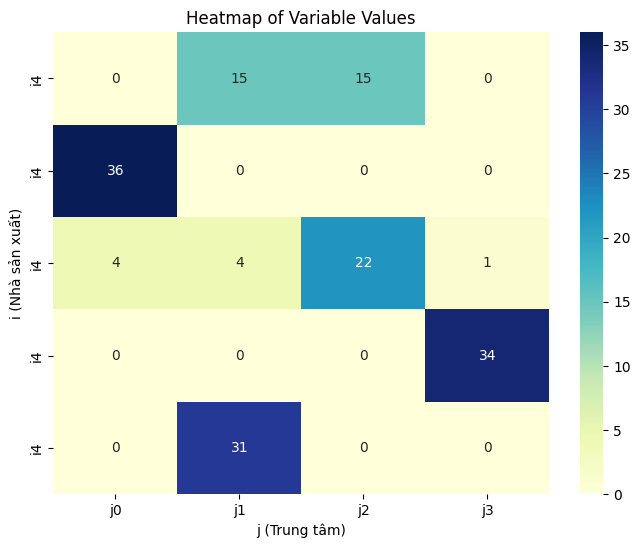

In [83]:


# Step 1: Get variables after solving the model
variables = model1_4.getVars()

# Step 2: Collect variable names and their corresponding values into a list or DataFrame
var_names = [v.varName for v in variables]
var_values = [v.X for v in variables]

# Step 3: Create a DataFrame for easy visualization
df = pd.DataFrame({
    'Variable': var_names,
    'Value': var_values
})

# Step 4: Display the DataFrame (or print the results)
print(df)


matrix = np.zeros((I, J))

for v in variables:
    # Use regular expression to extract indices
    match = re.search(r'\[(\d+),(\d+)\]', v.varName)  # Find indices within brackets
    if match:
        i, j = map(int, match.groups())  # Convert matched groups to integers
        matrix[i, j] = v.X

# Bước 5: Vẽ heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, cmap='YlGnBu', xticklabels=[f'j{j}' for j in range(J)], yticklabels=[f'i{i}' for j in range(I)]) # Corrected to range(I)
plt.title('Heatmap of Variable Values')
plt.xlabel('j (Trung tâm)')
plt.ylabel('i (Nhà sản xuất)')
plt.show()